# k-means 実装のための事前準備

In [1]:
import numpy as np
import pandas as pd

# 可視化
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set_style('whitegrid')

# 正規化のためのクラス
from sklearn.preprocessing import StandardScaler

# k-means法に必要なものをインポート
from sklearn.cluster import KMeans

Text(0, 0.5, 'petal_width')

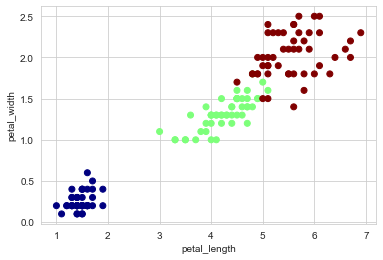

In [2]:
# irisデータ
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()
iris.keys()

# データフレームに格納
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target # アヤメの種類（正解ラベル）
df_iris.head()

# 2変数の散布図（正解ラベルで色分け）
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=df_iris.target, cmap=mpl.cm.jet)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

「petal_length」と「petal_width」の2変数で可視化
次に散布図行列で可視化

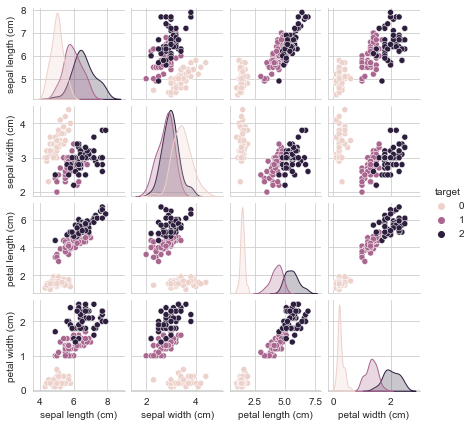

In [3]:
# 散布図行列（正解ラベルで色分け）
sns.pairplot(df_iris, hue='target', height=1.5)

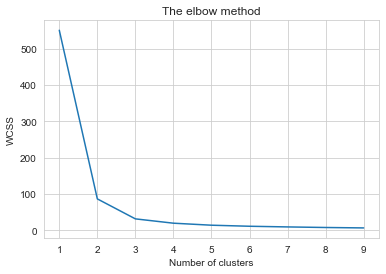

In [4]:
# Elbow Method
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 30, random_state = 0)
    kmeans.fit(df_iris.iloc[:, 2:4])
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

エルボー法を用いて、クラスタ数kを求める。

エルボー法とは、クラスタの数に応じてSSEを計算してグラフ化し、その形状から最適と思われるクラスタの数を選択する手法である。

SSE(Sum of Squared errors of prediction)とは「クラスタ内誤差平方和」と呼ばれる量であり、
(イメージとしては各クラスタの重心から各点までの距離の総和)

上記の結果を見ると、クラスタ数を3以上に設定する必要がないことがわかる

Text(0.5, 1.0, 'Predict')

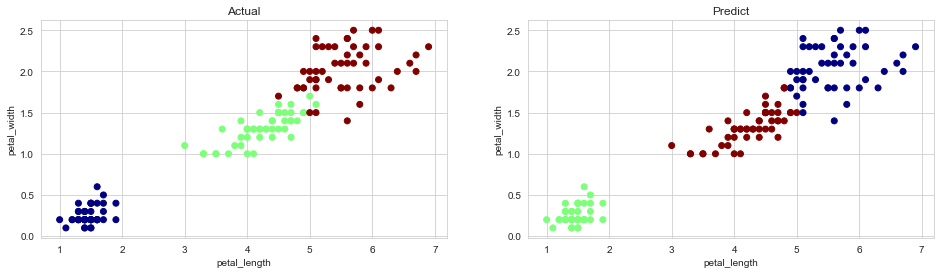

In [5]:
# モデリング
clf = KMeans(n_clusters=3, random_state=1)
clf.fit(df_iris.iloc[:, 2:4])

# 学習データのクラスタ番号
clf.labels_

# 未知データに対してクラスタ番号を付与
# 今回は学習データに対して予測しているので、`clf.labels_` と同じ結果
y_pred = clf.predict(df_iris.iloc[:, 2:4])
y_pred

# 実際の種類とクラスタリングの結果を比較
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2)

# 実際の種類の分布
ax1.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=df_iris.target, cmap=mpl.cm.jet)
ax1.set_xlabel('petal_length')
ax1.set_ylabel('petal_width')
ax1.set_title('Actual')
# クラスター分析で分類されたクラスタの分布
ax2.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=y_pred, cmap=mpl.cm.jet)
ax2.set_xlabel('petal_length')
ax2.set_ylabel('petal_width')
ax2.set_title('Predict')